# Predicción de precios utilizando aprendizaje automático 


Este proyecto tiene como objetivo predecir correctamente los precios inmobiliarios en Madrid. 
En particular, el proyecto se concibe como una experiencia de aprendizaje para el autor, evaluando 4 técnicas diferentes de aprendizaje automático para realizar las predicciones: regresión lineal utilizando mínimos cuadrados ordinarios (OLS), RandomForest Regressor, Catboost Regressor y LightGBM Regressor. A lo largo del informe se han incluido comentarios aclaratorios y al final se presenta una conclusión.


**Mejor resultado: puntaje R-cuadrado del 91% utilizando LGBM ajustado.** 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [100]:
raw_data = pd.read_csv('houses_Madrid.csv')

raw_data.head()

,Unnamed: 0,id,title,subtitle,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,latitude,longitude,raw_address,is_exact_address_hidden,street_name,street_number,portal,floor,is_floor_under,door,neighborhood_id,operation,rent_price,rent_price_by_area,is_rent_price_known,buy_price,buy_price_by_area,is_buy_price_known,house_type_id,is_renewal_needed,is_new_development,built_year,has_central_heating,has_individual_heating,are_pets_allowed,has_ac,has_fitted_wardrobes,has_lift,is_exterior,has_garden,has_pool,has_terrace,has_balcony,has_storage_room,is_furnished,is_kitchen_equipped,is_accessible,has_green_zones,energy_certificate,has_parking,has_private_parking,has_public_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east
0,0,21742,"Piso en venta en calle de Godella, 64","San Cristóbal, Madrid",64.00,60.00,2,1.00,NaN,NaN,NaN,NaN,"Calle de Godella, 64",False,Calle de Godella,64,NaN,3,False,NaN,Neighborhood 135: San Cristóbal (1308.89 €/m2)...,sale,471,NaN,False,85000,1328,True,HouseType 1: Pisos,False,False,1960.00,NaN,NaN,NaN,True,NaN,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,False,NaN,NaN,NaN,NaN,False,True,False,False
1,1,21741,Piso en venta en calle de la del Manojo de Rosas,"Los Ángeles, Madrid",70.00,NaN,3,1.00,NaN,NaN,NaN,NaN,Calle de la del Manojo de Rosas,True,Calle de la del Manojo de Rosas,NaN,NaN,4,False,NaN,Neighborhood 132: Los Ángeles (1796.68 €/m2) -...,sale,666,NaN,False,129900,1856,True,HouseType 1: Pisos,True,False,NaN,NaN,NaN,NaN,NaN,True,True,True,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,en trámite,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,21740,"Piso en venta en calle del Talco, 68","San Andrés, Madrid",94.00,54.00,2,2.00,NaN,NaN,NaN,NaN,"Calle del Talco, 68",False,Calle del Talco,68,NaN,1,False,NaN,Neighborhood 134: San Andrés (1617.18 €/m2) - ...,sale,722,NaN,False,144247,1535,True,HouseType 1: Pisos,False,False,NaN,False,True,NaN,NaN,True,True,True,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,no indicado,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,21739,Piso en venta en calle Pedro Jiménez,"San Andrés, Madrid",64.00,NaN,2,1.00,NaN,NaN,NaN,NaN,Calle Pedro Jiménez,True,Calle Pedro Jiménez,NaN,NaN,Bajo,True,NaN,Neighborhood 134: San Andrés (1617.18 €/m2) - ...,sale,583,NaN,False,109900,1717,True,HouseType 1: Pisos,False,False,1955.00,NaN,NaN,NaN,NaN,NaN,True,True,NaN,NaN,NaN,NaN,True,NaN,NaN,True,NaN,en trámite,False,NaN,NaN,NaN,NaN,False,False,True,False
4,4,21738,Piso en venta en carretera de Villaverde a Val...,"Los Rosales, Madrid",108.00,90.00,2,2.00,NaN,NaN,NaN,NaN,Carretera de Villaverde a Vallecas,True,Carretera de Villaverde a Vallecas,NaN,NaN,4,False,NaN,Neighborhood 133: Los Rosales (1827.79 €/m2) -...,sale,1094,NaN,False,260000,2407,True,HouseType 1: Pisos,False,False,2003.00,NaN,NaN,NaN,True,True,True,True,NaN,True,NaN,NaN,True,NaN,NaN,NaN,True,en trámite,True,NaN,NaN,True,0.00,True,True,True,True


In [101]:
raw_data.describe()

,Unnamed: 0,id,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,latitude,longitude,portal,door,rent_price,rent_price_by_area,buy_price,buy_price_by_area,built_year,are_pets_allowed,is_furnished,is_kitchen_equipped,has_private_parking,has_public_parking,parking_price
count,21742.00,21742.00,21616.00,8228.00,21742.00,21726.00,1437.00,1432.00,0.00,0.00,0.00,0.00,21742.00,0.00,21742.00,21742.00,10000.00,0.00,0.00,0.00,0.00,0.00,7719.00
mean,10870.50,10871.50,146.92,103.46,3.01,2.09,3.13,241.69,NaN,NaN,NaN,NaN,-59170.31,NaN,653735.65,4020.52,1970.05,NaN,NaN,NaN,NaN,NaN,2658.00
std,6276.52,6276.52,134.18,88.26,1.51,1.41,0.91,247.48,NaN,NaN,NaN,NaN,917116.18,NaN,782082.07,1908.42,69.39,NaN,NaN,NaN,NaN,NaN,13360.97
min,0.00,1.00,13.00,1.00,0.00,1.00,1.00,1.00,NaN,NaN,NaN,NaN,-34590276.00,NaN,36000.00,447.00,1723.00,NaN,NaN,NaN,NaN,NaN,0.00
25%,5435.25,5436.25,70.00,59.00,2.00,1.00,2.00,2.00,NaN,NaN,NaN,NaN,725.00,NaN,198000.00,2551.00,1957.00,NaN,NaN,NaN,NaN,NaN,0.00
50%,10870.50,10871.50,100.00,79.00,3.00,2.00,3.00,232.00,NaN,NaN,NaN,NaN,1116.00,NaN,375000.00,3720.00,1970.00,NaN,NaN,NaN,NaN,NaN,0.00
75%,16305.75,16306.75,162.00,113.00,4.00,2.00,4.00,354.00,NaN,NaN,NaN,NaN,1687.00,NaN,763600.00,5000.00,1994.00,NaN,NaN,NaN,NaN,NaN,0.00
max,21741.00,21742.00,999.00,998.00,24.00,16.00,7.00,997.00,NaN,NaN,NaN,NaN,2517.00,NaN,8800000.00,18889.00,8170.00,NaN,NaN,NaN,NaN,NaN,600000.00


Se explorarán las características con mayor correlación con el precio de compra (buy_price), así como aquellas características que lógicamente aumentarían el precio.

In [4]:
raw_data.corr()['buy_price'].sort_values(ascending=False)

buy_price                  1.000000
sq_mt_built                0.832039
sq_mt_useful               0.809959
n_bathrooms                0.772218
n_rooms                    0.608893
buy_price_by_area          0.519645
has_parking                0.330515
is_exact_address_hidden    0.166835
Unnamed: 0                 0.165192
n_floors                   0.046492
is_renewal_needed          0.044302
parking_price              0.020581
built_year                 0.008514
sq_mt_allotment           -0.025751
id                        -0.165192
rent_price                -0.468449
latitude                        NaN
longitude                       NaN
portal                          NaN
door                            NaN
rent_price_by_area              NaN
is_rent_price_known             NaN
is_buy_price_known              NaN
are_pets_allowed                NaN
is_furnished                    NaN
is_kitchen_equipped             NaN
has_private_parking             NaN
has_public_parking          

In [5]:
#borrando datos innecesarios
data = raw_data.filter(['sq_mt_built','n_rooms','n_bathrooms', 'buy_price','buy_price_by_area','built_year',
                        'has_parking','is_orientation_south', 'has_lift','has_central_heating', 'subtitle'])

data.head()

,sq_mt_built,n_rooms,n_bathrooms,buy_price,buy_price_by_area,built_year,has_parking,is_orientation_south,has_lift,has_central_heating,subtitle
0,64.0,2,1.0,85000,1328,1960.0,False,False,False,NaN,"San Cristóbal, Madrid"
1,70.0,3,1.0,129900,1856,NaN,False,NaN,True,NaN,"Los Ángeles, Madrid"
2,94.0,2,2.0,144247,1535,NaN,False,NaN,True,False,"San Andrés, Madrid"
3,64.0,2,1.0,109900,1717,1955.0,False,True,True,NaN,"San Andrés, Madrid"
4,108.0,2,2.0,260000,2407,2003.0,True,True,True,NaN,"Los Rosales, Madrid"


In [102]:
data.describe()

,"Abrantes, Madrid","Acacias, Madrid","Adelfas, Madrid","Alameda de Osuna, Madrid","Almagro, Madrid","Almendrales, Madrid","Aluche, Madrid","Ambroz, Madrid","Apóstol Santiago, Madrid","Arapiles, Madrid","Aravaca, Madrid","Arganzuela, Madrid","Argüelles, Madrid","Arroyo del Fresno, Madrid","Atalaya, Madrid","Barajas, Madrid","Barrio de Salamanca, Madrid","Bellas Vistas, Madrid","Bernabéu-Hispanoamérica, Madrid","Berruguete, Madrid","Buena Vista, Madrid","Butarque, Madrid","Campamento, Madrid","Campo de las Naciones-Corralejos, Madrid","Canillas, Madrid","Carabanchel, Madrid","Casa de Campo, Madrid","Casco Histórico de Barajas, Madrid","Casco Histórico de Vallecas, Madrid","Casco Histórico de Vicálvaro, Madrid","Castellana, Madrid","Castilla, Madrid","Centro, Madrid","Chamartín, Madrid","Chamberí, Madrid","Chopera, Madrid","Chueca-Justicia, Madrid","Ciudad Jardín, Madrid","Ciudad Lineal, Madrid","Ciudad Universitaria, Madrid","Colina, Madrid","Comillas, Madrid","Concepción, Madrid","Conde Orgaz-Piovera, Madrid","Costillares, Madrid","Cuatro Caminos, Madrid","Cuatro Vientos, Madrid","Cuzco-Castillejos, Madrid","Delicias, Madrid","El Cañaveral - Los Berrocales, Madrid","El Pardo, Madrid","El Plantío, Madrid","El Viso, Madrid","Ensanche de Vallecas - La Gavia, Madrid","Entrevías, Madrid","Estrella, Madrid","Fontarrón, Madrid","Fuencarral, Madrid","Fuente del Berro, Madrid","Fuentelarreina, Madrid","Gaztambide, Madrid","Goya, Madrid","Guindalera, Madrid","Horcajo, Madrid","Hortaleza, Madrid","Huertas-Cortes, Madrid","Ibiza, Madrid","Imperial, Madrid","Jerónimos, Madrid","La Paz, Madrid","Las Tablas, Madrid","Latina, Madrid","Lavapiés-Embajadores, Madrid","Legazpi, Madrid","Lista, Madrid","Los Cármenes, Madrid","Los Rosales, Madrid","Los Ángeles, Madrid","Lucero, Madrid","Malasaña-Universidad, Madrid","Marroquina, Madrid","Media Legua, Madrid","Mirasierra, Madrid","Moncloa, Madrid","Montecarmelo, Madrid","Moratalaz, Madrid","Moscardó, Madrid","Niño Jesús, Madrid","Nueva España, Madrid","Nuevos Ministerios-Ríos Rosas, Madrid","Numancia, Madrid","Opañel, Madrid","Orcasitas, Madrid","Pacífico, Madrid","Palacio, Madrid","Palomas, Madrid","Palomeras Bajas, Madrid","Palomeras sureste, Madrid","Palos de Moguer, Madrid","Pau de Carabanchel, Madrid","Pavones, Madrid","Peñagrande, Madrid","Pilar, Madrid","Pinar del Rey, Madrid","Portazgo, Madrid","Pradolongo, Madrid","Prosperidad, Madrid","Pueblo Nuevo, Madrid","Puente de Vallecas, Madrid","Puerta Bonita, Madrid","Puerta del Ángel, Madrid","Quintana, Madrid","Recoletos, Madrid","Retiro, Madrid","San Andrés, Madrid","San Cristóbal, Madrid","San Diego, Madrid","San Fermín, Madrid","San Isidro, Madrid","San Juan Bautista, Madrid","San Pascual, Madrid","Sanchinarro, Madrid","Santa Eugenia, Madrid","Sol, Madrid","Tetuán, Madrid","Timón, Madrid","Trafalgar, Madrid","Tres Olivos - Valverde, Madrid","Usera, Madrid","Valdeacederas, Madrid","Valdebebas - Valdefuentes, Madrid","Valdebernardo - Valderribas, Madrid","Valdemarín, Madrid","Valdezarza, Madrid","Vallehermoso, Madrid","Ventas, Madrid","Ventilla-Almenara, Madrid","Vicálvaro, Madrid","Villa de Vallecas, Madrid","Villaverde, Madrid","Vinateros, Madrid","Virgen del Cortijo - Manoteras, Madrid","Vista Alegre, Madrid","Zofío, Madrid","Águilas, Madrid",sq_mt_built,built_year,log_price
count,20586.00,20586.00,20586.00,20586.00,20586.00,20586.00,20586.00,20586.00,20586.00,20586.00,20586.00,20586.00,20586.00,20586.00,20586.00,20586.00,20586.00,20586.00,20586.00,20586.00,20586.00,20586.00,20586.00,20586.00,20586.00,20586.00,20586.00,20586.00,20586.00,20586.00,20586.00,20586.00,20586.00,20586.00,20586.00,20586.00,20586.00,20586.00,20586.00,20586.00,20586.00,20586.00,20586.00,20586.00,20586.00,20586.00,20586.00,20586.00,20586.00,20586.00,20586.00,20586.00,20586.00,20586.00,20586.00,20586.00,20586.00,20586.00,20586.00,20586.00,20586.00,20586.00,20586.00,20586.00,20586.00,20586.00,20586.00,20586.00,20586.00,20586.00,20586.00,20586.00,20586.00,20586.00,20586.0

La característica built_year será interesante de explorar, y su cuenta de puntos de datos es de solo 10,000, lo que significa que más de la mitad de los datos para esta característica no están disponibles. Utilizaremos la función fillna con el promedio de built_year para que no perdamos estos datos valiosos.

In [7]:

data.isnull().sum()

sq_mt_built               126
n_rooms                     0
n_bathrooms                16
buy_price                   0
buy_price_by_area           0
built_year              11742
has_parking                 0
is_orientation_south    10384
has_lift                 2386
has_central_heating      8134
subtitle                    0
dtype: int64

In [8]:
data.mean()

C:\Users\lojit\AppData\Local\Temp\ipykernel_12656\531903386.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.mean()


sq_mt_built                146.920892
n_rooms                      3.005749
n_bathrooms                  2.091687
buy_price               653735.647503
buy_price_by_area         4020.523871
built_year                1970.046400
has_parking                  0.355027
is_orientation_south         0.512678
has_lift                     0.769529
has_central_heating          0.300705
dtype: float64

In [9]:
# Rellenar los datos que faltan con la media.
data= data.fillna(data.mean())
data.isnull().sum()

C:\Users\lojit\AppData\Local\Temp\ipykernel_12656\1345948420.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data= data.fillna(data.mean())


sq_mt_built             0
n_rooms                 0
n_bathrooms             0
buy_price               0
buy_price_by_area       0
built_year              0
has_parking             0
is_orientation_south    0
has_lift                0
has_central_heating     0
subtitle                0
dtype: int64

# Valores atípicos (outliers).

<AxesSubplot:xlabel='buy_price', ylabel='Density'>

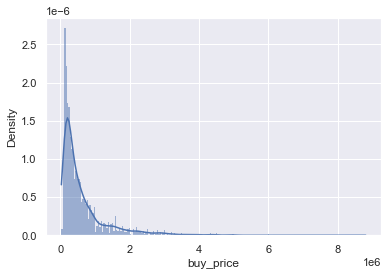

In [10]:

sns.histplot(data['buy_price'],kde=True, stat="density", linewidth=0)

Se detectan valores atípicos. Aquí, los valores atípicos se encuentran en torno a los precios más altos (lado derecho del gráfico) y si se excluye el lado derecho, los precios parecen tener una distribución normal

In [11]:
# Vamos a declarar una variable que será igual al percentil 95 de la variable 'buy_price'.

q = data['buy_price'].quantile(0.95)

# Luego podemos crear un nuevo dataframe (df) con la condición de que todos los precios deben ser inferiores al percentil 95.
data = data[data['buy_price']<q]

data.describe(include='all')


,sq_mt_built,n_rooms,n_bathrooms,buy_price,buy_price_by_area,built_year,has_parking,is_orientation_south,has_lift,has_central_heating,subtitle
count,20587.000000,20587.000000,20587.000000,2.058700e+04,20587.000000,20587.000000,20587,20587.000000,20587,20587,20587
unique,NaN,NaN,NaN,NaN,NaN,NaN,2,3.000000,3,3,146
top,NaN,NaN,NaN,NaN,NaN,NaN,False,0.512678,True,False,"Chamartín, Madrid"
freq,NaN,NaN,NaN,NaN,NaN,NaN,13718,9901.000000,14316,9151,649
mean,128.659819,2.860640,1.915547,5.118365e+05,3885.937728,1970.007966,NaN,NaN,NaN,NaN,NaN
std,99.115504,1.336969,1.142888,4.432467e+05,1755.412336,48.092061,NaN,NaN,NaN,NaN,NaN
min,13.000000,0.000000,1.000000,3.600000e+04,447.000000,1723.000000,NaN,NaN,NaN,NaN,NaN
25%,70.000000,2.000000,1.000000,1.900000e+05,2500.000000,1970.046400,NaN,NaN,NaN,NaN,NaN
50%,96.000000,3.000000,2.000000,3.500000e+05,3638.000000,1970.046400,NaN,NaN,NaN,NaN,NaN
75%,148.000000,4.000000,2.000000,6.700000e+05,4867.000000,1970.046400,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='buy_price', ylabel='Density'>

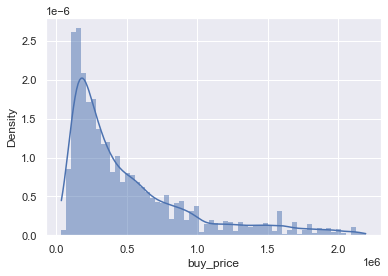

In [12]:
sns.histplot(data['buy_price'],kde=True, stat="density", linewidth=0)

Al eliminar los valores atípicos, el gráfico se concentra mucho más en los puntos de datos reales, se ve más "normal" como si estuviera distribuido de manera normal. En general, eliminar el 5% del conjunto de datos no debería plantear problemas de representatividad de los datos.

<AxesSubplot:xlabel='built_year', ylabel='Density'>

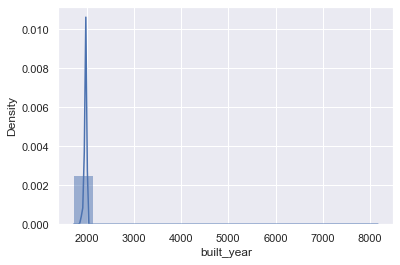

In [13]:
sns.histplot(data['built_year'],kde=True, stat="density", linewidth=0)

<AxesSubplot:xlabel='built_year', ylabel='Density'>

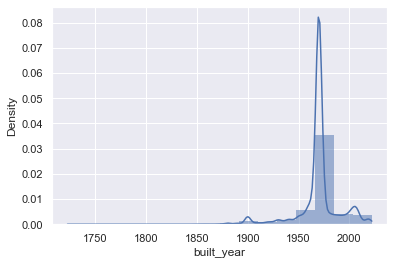

In [14]:
# Hay una dato para el año de construcción (built_year) en 8170, 
# como se puede ver arriba con la función .describe(). Vamos a eliminar esta observación:
data = data[data['built_year'] != 8170]
sns.histplot(data['built_year'],kde=True, stat="density", linewidth=0)

In [15]:
# Reseteamos los datos ya que quitamos muchos
data = data.reset_index(drop=True)

In [16]:
data.describe(include='all')

,sq_mt_built,n_rooms,n_bathrooms,buy_price,buy_price_by_area,built_year,has_parking,is_orientation_south,has_lift,has_central_heating,subtitle
count,20586.000000,20586.000000,20586.000000,2.058600e+04,20586.000000,20586.000000,20586,20586.000000,20586,20586,20586
unique,NaN,NaN,NaN,NaN,NaN,NaN,2,3.000000,3,3,146
top,NaN,NaN,NaN,NaN,NaN,NaN,False,0.512678,True,False,"Chamartín, Madrid"
freq,NaN,NaN,NaN,NaN,NaN,NaN,13717,9900.000000,14315,9151,649
mean,128.661696,2.860633,1.915592,5.118252e+05,3885.724376,1969.706791,NaN,NaN,NaN,NaN,NaN
std,99.117545,1.337001,1.142898,4.432545e+05,1755.188029,21.106719,NaN,NaN,NaN,NaN,NaN
min,13.000000,0.000000,1.000000,3.600000e+04,447.000000,1723.000000,NaN,NaN,NaN,NaN,NaN
25%,70.000000,2.000000,1.000000,1.900000e+05,2500.000000,1970.046400,NaN,NaN,NaN,NaN,NaN
50%,96.000000,3.000000,2.000000,3.500000e+05,3638.000000,1970.046400,NaN,NaN,NaN,NaN,NaN
75%,148.000000,4.000000,2.000000,6.700000e+05,4866.750000,1970.046400,NaN,NaN,NaN,NaN,NaN


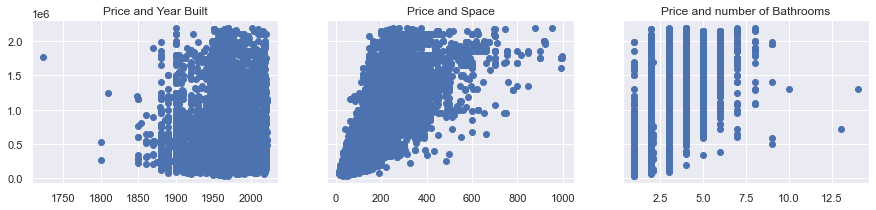

In [17]:
#graficamos algunos parametros juntos

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data['built_year'],data['buy_price'])
ax1.set_title('Price and Year Built')
ax2.scatter(data['sq_mt_built'],data['buy_price'])
ax2.set_title('Price and Space')
ax3.scatter(data['n_bathrooms'],data['buy_price'])
ax3.set_title('Price and number of Bathrooms')


plt.show()

In [18]:
# Aplicamos transformaacion logaritmica al precio
log_price = np.log(data['buy_price'])

# y lo añadimos a nuestro dataset
data['log_price'] = log_price
data.head()

,sq_mt_built,n_rooms,n_bathrooms,buy_price,buy_price_by_area,built_year,has_parking,is_orientation_south,has_lift,has_central_heating,subtitle,log_price
0,64.0,2,1.0,85000,1328,1960.0000,False,False,False,0.300705,"San Cristóbal, Madrid",11.350407
1,70.0,3,1.0,129900,1856,1970.0464,False,0.512678,True,0.300705,"Los Ángeles, Madrid",11.774520
2,94.0,2,2.0,144247,1535,1970.0464,False,0.512678,True,False,"San Andrés, Madrid",11.879282
3,64.0,2,1.0,109900,1717,1955.0000,False,True,True,0.300705,"San Andrés, Madrid",11.607326
4,108.0,2,2.0,260000,2407,2003.0000,True,True,True,0.300705,"Los Rosales, Madrid",12.468437


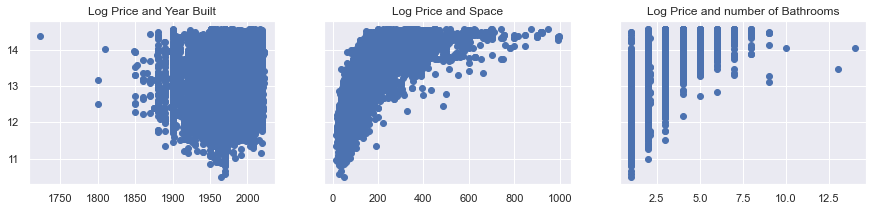

In [19]:
#log plots
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data['built_year'],data['log_price'])
ax1.set_title('Log Price and Year Built')
ax2.scatter(data['sq_mt_built'],data['log_price'])
ax2.set_title('Log Price and Space')
ax3.scatter(data['n_bathrooms'],data['log_price'])
ax3.set_title('Log Price and number of Bathrooms')


plt.show()

In [20]:
# quitamos el antiguo precio
data = data.drop(['buy_price'],axis=1)

Parece que la característica del año de construcción (built_year) no tiene una relación clara con el precio de compra (buy_price).


# Explorando la correlación de características y multicolinealidad.

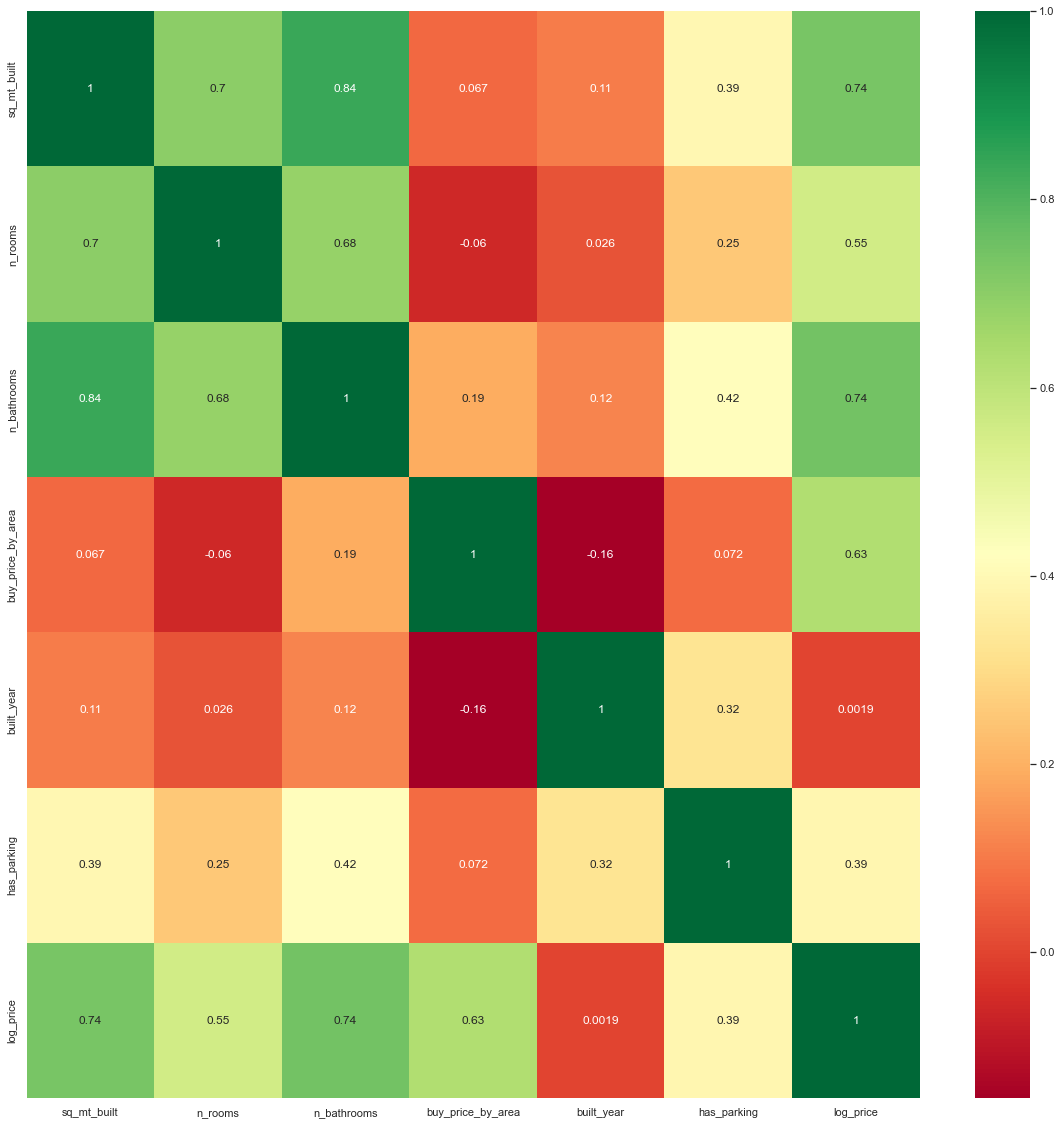

In [21]:
import seaborn as sns
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")


Ahora es mucho más claro cuál es la correlación entre todos los conjuntos de datos. Para los valores en verde, tenemos una alta correlación, mientras que para los valores en rojo, hay poca o ninguna correlación entre los parámetros en el conjunto de datos. La mayoría de los parámetros tienen al menos alguna correlación con el logaritmo del precio, lo cual es un buen indicador de que la lógica aplicada al principio tiene cierta lógica.

In [22]:
# usaremos statsmodels para chequear la multicolinearidad
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Vamos a declarar una variable para almacenar todas las características que se verificarán para la multicolinealidad. 
variables = data[['sq_mt_built', 'n_bathrooms', 'built_year', 'buy_price_by_area', 'n_rooms']]

#Creamos un nuevo dataframe que incluye todos los vifs
vif = pd.DataFrame()

# Utilicemos la función variance_inflation_factor para calcular los factores de inflación de la varianza (VIF) respectivos. 
#Esto nos proporcionará los VIFs correspondientes.
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
# Vamos a incluir los nombres de las características para facilitar la exploración del resultado.
vif["Features"] = variables.columns

vif

,VIF,Features
0,10.101336,sq_mt_built
1,14.854578,n_bathrooms
2,11.391233,built_year
3,6.561685,buy_price_by_area
4,12.194722,n_rooms


Dado que el número de baños y el número de habitaciones tienen un alto VIF, uno de ellos será eliminado del modelo. Esto reducirá el VIF de otras variables. Por lo tanto, aunque sq_mt_built parezca tener un alto VIF, una vez que se elimine la característica n_bathrooms, esto ya no será así.

In [23]:
data = data.drop(['n_bathrooms'],axis=1)

#lCheck vif de nuevo
variables = data[['built_year','sq_mt_built','n_rooms', 'buy_price_by_area']]

vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

vif["Features"] = variables.columns

vif

,VIF,Features
0,11.390730,built_year
1,5.378013,sq_mt_built
2,11.135439,n_rooms
3,6.005671,buy_price_by_area


El puntaje VIF de n_rooms está por encima del umbral de 5, por lo que también debe ser eliminado.

In [24]:
data = data.drop(['n_rooms'],axis=1)

#Check VIF de nuevo
variables = data[['built_year','sq_mt_built', 'buy_price_by_area']]

vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

vif["Features"] = variables.columns

vif

,VIF,Features
0,7.194098,built_year
1,2.704413,sq_mt_built
2,5.880915,buy_price_by_area



Dado que la variable buy_price_by_area es bastante similar a la variable a predecir, se eliminará.

In [25]:
data = data.drop(['buy_price_by_area'],axis=1)
#Check VIF de nuevo
variables = data[['built_year','sq_mt_built']]

vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

vif["Features"] = variables.columns

vif

,VIF,Features
0,2.692488,built_year
1,2.692488,sq_mt_built


Vamos a crear variables ficticias (dummies) para la característica de ubicación, que se utilizarán en la regresión.

In [26]:
# Los datos de ubicación parecen ser una característica lógica para incluir en un modelo de predicción.
dummies_subtitle = pd.get_dummies(data['subtitle'], drop_first=True)
#Usar el parámetro drop_first garantiza que no se produzca multicolinealidad entre la primera variable ficticia y las demás.
data = pd.concat([dummies_subtitle, data],axis=1)
#uniendo los dos datasets

Ahora, el dataframe incluye una columna para cada barrio de Madrid, con un resultado binario (por ejemplo, ¿Se encuentra  en el barrio X? -> resultado sí/no, o 1-0). Estos parámetros se pueden utilizar en los algoritmos para predecir el precio de los bienes raíces.

# Tecnica 1: Linear regression - Ordinary Least Squares

In [27]:
# Primero, vamos a eliminar las variables con menor poder explicativo.

data = data.drop(['is_orientation_south', 'has_lift','has_central_heating'],axis=1)
# Como último paso, debemos eliminar la columna 'subtitle', ya que ya se convirtió en variables ficticias.
data_preprocessed = data.drop(['subtitle'],axis=1)

In [28]:
targets = data_preprocessed['log_price']

inputs = data_preprocessed.drop(['log_price'],axis=1)

Los datos se escalarán para el modelo OLS, de modo que la escala de cada característica no afecte negativamente al modelo.

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(inputs)

#Vamos a almacenar los parámetros de escala en una nueva variable.

inputs_scaled = scaler.transform(inputs)

In [30]:
from sklearn.model_selection import train_test_split

# Vamos a dividir las variables en una proporción de 80-20, utilizando un estado aleatorio para la división.
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=42)

print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

(16468, 148) (16468,)
(4118, 148) (4118,)


In [31]:

reg = LinearRegression()

reg.fit(x_train,y_train)


y_hat = reg.predict(x_train)

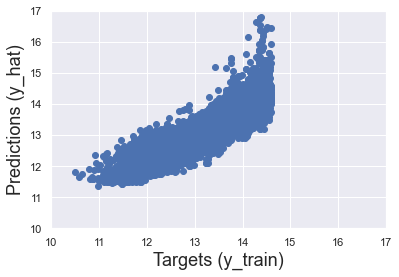

In [32]:
# La forma más sencilla de comparar los valores objetivo (y_train) y las predicciones (y_hat) es graficarlos en un diagrama de dispersión (scatter plot). 
#Cuanto más cerca estén los puntos de la línea de 45 grados, mejor será la predicción.
plt.scatter(y_train, y_hat)

plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)

plt.xlim(10,17)
plt.ylim(10,17)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

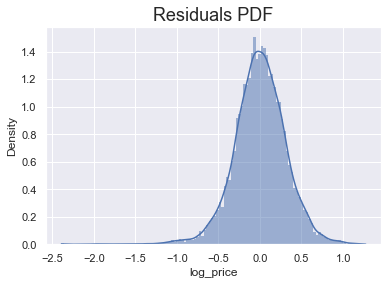

In [33]:
sns.histplot(y_train - y_hat, kde=True, stat="density", linewidth=0)

plt.title("Residuals PDF", size=18)



Parece que las predicciones son menos precisas en los valores atípicos de precios, tanto en los rangos más bajos como en los más altos.

In [34]:
# R cuadrado
reg.score(x_train,y_train)



0.8425093329036228

In [35]:
reg.intercept_

12.82125246243013

In [36]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,"Abrantes, Madrid",-0.004661
1,"Acacias, Madrid",0.060996
2,"Adelfas, Madrid",0.049218
3,"Alameda de Osuna, Madrid",0.013464
4,"Almagro, Madrid",0.122993
...,...,...
143,"Zofío, Madrid",-0.004637
144,"Águilas, Madrid",-0.003213
145,sq_mt_built,0.418690
146,built_year,0.029318


**Testing**

In [37]:
y_hat_test_OLS = reg.predict(x_test)

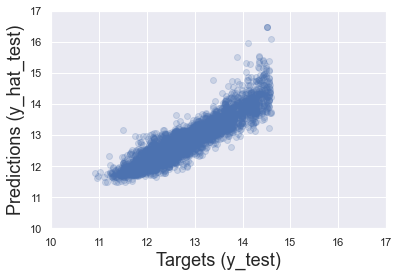

In [38]:
plt.scatter(y_test, y_hat_test_OLS, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(10,17)
plt.ylim(10,17)
plt.show()

Existen algunas predicciones fuera de la línea de 45 grados, lo que sugiere que el algoritmo tuvo dificultades para predecir correctamente los precios, especialmente en los terciles inferiores y superiores de los rangos de precios. El algoritmo tuvo un mejor desempeño al predecir los precios en el centro del rango. Esto es consistente con la limitación inherente del OLS para lidiar con valores atípicos.


In [39]:
# Chequeamos estas predicciones manualmente
df_pf = pd.DataFrame(np.exp(y_hat_test_OLS), columns=['Prediction'])

y_test = y_test.reset_index(drop=True)

df_pf['Target'] = np.exp(y_test)

df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']


df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,7.652823e+05,850000.0,84717.738639,9.966793
1,1.770248e+05,99000.0,-78024.848477,78.812978
2,2.136400e+05,199000.0,-14640.010365,7.356789
3,1.437882e+05,130000.0,-13788.225768,10.606328
4,3.948788e+05,395000.0,121.187970,0.030680
...,...,...,...,...
4113,5.583389e+05,414000.0,-144338.919648,34.864473
4114,1.781582e+05,149000.0,-29158.248936,19.569295
4115,8.386713e+05,725000.0,-113671.260048,15.678794
4116,1.509184e+05,159000.0,8081.553446,5.082738


In [40]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,4.118000e+03,4.118000e+03,4.118000e+03,4118.000000
mean,5.172369e+05,5.205846e+05,3.347673e+03,25.816590
std,6.471187e+05,4.511602e+05,4.676667e+05,31.417481
min,9.645060e+04,5.500000e+04,-1.216826e+07,0.001561
25%,2.053713e+05,1.940000e+05,-4.932932e+04,8.979438
50%,3.638375e+05,3.590000e+05,1.360977e+03,19.664583
75%,5.994009e+05,6.850000e+05,8.406754e+04,33.517688
max,1.416826e+07,2.190000e+06,1.533088e+06,610.078893


In [41]:
pd.options.display.max_rows = 20
#Para hacer que el conjunto de datos sea más claro, podemos mostrar el resultado con solo 2 dígitos después del punto decimal.
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Finalmente, podemos ordenar los resultados por diferencia en porcentaje y revisar manualmente el modelo.
df_pf.sort_values(by=['Difference%'], ascending = False)

,Prediction,Target,Residual,Difference%
1790,14130569.96,1990000.00,-12140569.96,610.08
703,14168262.43,2000000.00,-12168262.43,608.41
3715,14168262.43,2000000.00,-12168262.43,608.41
2164,8417518.91,1350000.00,-7067518.91,523.52
3879,510942.16,99000.00,-411942.16,416.10
...,...,...,...,...
1673,130910.16,131000.00,89.84,0.07
2755,600281.44,600000.00,-281.44,0.05
4,394878.81,395000.00,121.19,0.03
2171,1495058.68,1495000.00,-58.68,0.00


In [42]:
#Como último paso, vamos a importar el módulo de métricas y revisar las siguientes métricas:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_hat_test_OLS, y_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_hat_test_OLS, y_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_hat_test_OLS, y_test)))

from sklearn.metrics import r2_score
r2_OLS = r2_score (y_hat_test_OLS, y_test)

print ('R-squared score', round (r2_OLS,2))

Mean Absolute Error: 0.24352898579893062
Mean Squared Error: 0.10127140065264154
Root Mean Squared Error: 0.318231677638543
R-squared score 0.81


# Tecnica 2: Random forest regressor

In [43]:
from sklearn.ensemble import RandomForestRegressor

In [44]:
import time
start = time.time()
rf = RandomForestRegressor()

In [45]:
rf.fit(x_train,y_train)
end = time.time()
diff_rf = end - start
print ('Execution time RF:', round(diff_rf,2),'seconds')

Execution time RF: 35.19 seconds


In [46]:
y_hat_rf = rf.predict(x_train)

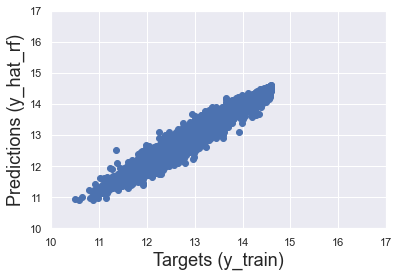

In [47]:
plt.scatter(y_train, y_hat_rf)

plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat_rf)',size=18)


plt.xlim(10,17)
plt.ylim(10,17)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

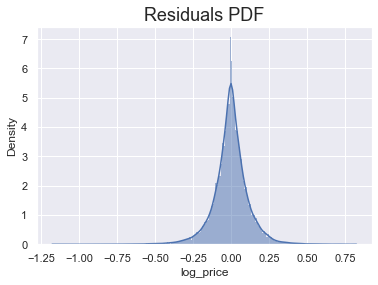

In [48]:
sns.histplot(y_train - y_hat_rf, kde=True, stat="density", linewidth=0)

plt.title("Residuals PDF", size=18)

In [49]:
# Rcuadrado
from sklearn.metrics import r2_score

r2 = r2_score (y_train, y_hat_rf)

print ('R-squared score', round (r2,2))


R-squared score 0.98


Vamos a probar ahora el modelo en los valores de prueba. Es posible que el modelo haya sobreajustado, por lo que para probar su verdadera capacidad predictiva, debemos darle un conjunto de datos en el que no haya sido entrenado.

In [50]:
y_hat_test_rf = rf.predict(x_test)

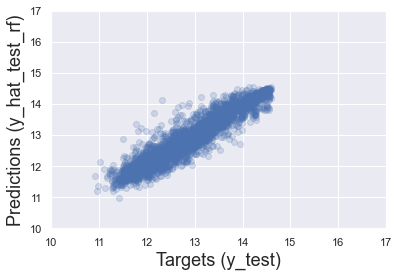

In [51]:
plt.scatter(y_test,y_hat_test_rf, alpha = 0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test_rf)',size=18)
plt.xlim(10,17)
plt.ylim(10,17)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

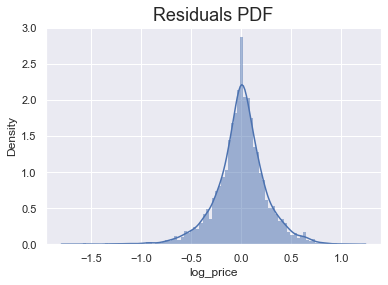

In [52]:
sns.histplot(y_test-y_hat_test_rf, kde=True, stat="density", linewidth=0)

plt.title("Residuals PDF", size=18)

In [53]:
df_pf = pd.DataFrame(np.exp(y_hat_test_rf), columns=['Prediction'])
y_test = y_test.reset_index(drop=True)
df_pf['Target'] = np.exp(y_test)
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,709482.67,850000.00,140517.33,16.53
1,211570.84,99000.00,-112570.84,113.71
2,182769.18,199000.00,16230.82,8.16
3,125903.39,130000.00,4096.61,3.15
4,361777.19,395000.00,33222.81,8.41
...,...,...,...,...
4113,526571.71,414000.00,-112571.71,27.19
4114,218944.04,149000.00,-69944.04,46.94
4115,914788.38,725000.00,-189788.38,26.18
4116,146261.05,159000.00,12738.95,8.01


In [54]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,4118.00,4118.00,4118.00,4118.00
mean,513296.36,520584.60,7288.23,19.36
std,425572.02,451160.18,162343.28,25.16
min,58221.25,55000.00,-1136836.40,0.00
25%,197013.34,194000.00,-38676.83,5.38
50%,352681.57,359000.00,707.03,12.76
75%,698434.75,685000.00,47723.78,25.32
max,2096333.70,2190000.00,1109777.74,505.26


In [55]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by=['Difference%'], ascending = False)

,Prediction,Target,Residual,Difference%
3914,1361836.40,225000.00,-1136836.40,505.26
2299,626852.91,130000.00,-496852.91,382.19
1139,896624.07,190000.00,-706624.07,371.91
3879,381752.25,99000.00,-282752.25,285.61
797,552737.97,145000.00,-407737.97,281.20
...,...,...,...,...
2196,1599000.00,1599000.00,-0.00,0.00
2182,1599000.00,1599000.00,-0.00,0.00
2358,1599000.00,1599000.00,-0.00,0.00
2540,1599000.00,1599000.00,-0.00,0.00


In [56]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_hat_test_rf, y_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_hat_test_rf, y_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_hat_test_rf, y_test)))

r2_rf = r2_score (y_hat_test_rf, y_test)

print ('R-squared score', round (r2_rf,2))

Mean Absolute Error: 0.18305598614138235
Mean Squared Error: 0.06668034221930713
Root Mean Squared Error: 0.25822537098299836
R-squared score 0.89


# Tecnica 3: Catboost Regresssor

In [57]:
from catboost import CatBoostRegressor

In [58]:
start = time.time()
cb=CatBoostRegressor()

In [59]:
cb.fit(x_train,y_train, verbose = False)
end = time.time()
diff_cb = end - start
print ('Execution time for CB:', round(diff_cb,2), 'seconds')

Execution time for CB: 16.91 seconds


In [60]:
y_hat_cb = cb.predict(x_train)

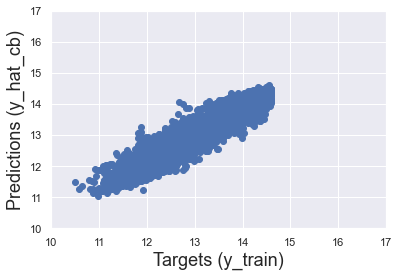

In [61]:
plt.scatter(y_train, y_hat_cb)

plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat_cb)',size=18)


plt.xlim(10,17)
plt.ylim(10,17)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

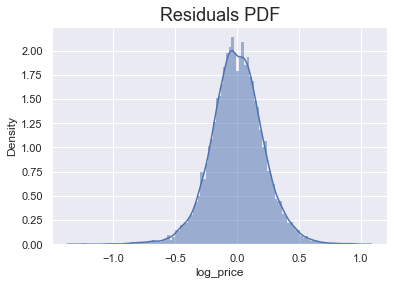

In [62]:
sns.histplot(y_train - y_hat_cb, kde=True, stat="density", linewidth=0)

plt.title("Residuals PDF", size=18)


In [63]:
r2 = r2_score (y_train, y_hat_cb)

print ('R-squared score', round (r2,2))

R-squared score 0.93


Vamos a probar el modelo en los valores de prueba 

In [64]:
y_hat_test_cb=cb.predict(x_test)

<AxesSubplot:xlabel='log_price', ylabel='Density'>

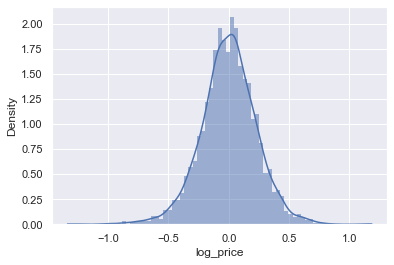

In [65]:
sns.histplot(y_test-y_hat_test_cb, kde=True, stat="density", linewidth=0)

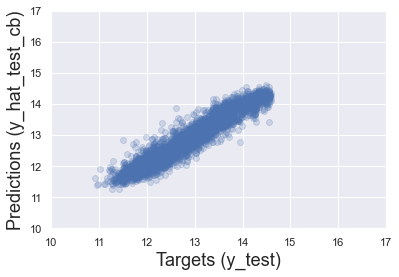

In [66]:
plt.scatter(y_test,y_hat_test_cb, alpha = 0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test_cb)',size=18)
plt.xlim(10,17)
plt.ylim(10,17)
plt.show()

In [67]:
df_pf = pd.DataFrame(np.exp(y_hat_test_cb), columns=['Prediction'])

y_test = y_test.reset_index(drop=True)

df_pf['Target'] = np.exp(y_test)

df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']


df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,684102.69,850000.00,165897.31,19.52
1,180999.98,99000.00,-81999.98,82.83
2,192253.88,199000.00,6746.12,3.39
3,131520.02,130000.00,-1520.02,1.17
4,314067.27,395000.00,80932.73,20.49
...,...,...,...,...
4113,497042.20,414000.00,-83042.20,20.06
4114,208453.00,149000.00,-59453.00,39.90
4115,1013722.29,725000.00,-288722.29,39.82
4116,170177.51,159000.00,-11177.51,7.03


In [68]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,4118.00,4118.00,4118.00,4118.00
mean,502723.29,520584.60,17861.31,18.28
std,403694.87,451160.18,159048.29,18.05
min,77405.42,55000.00,-767463.37,0.02
25%,201774.29,194000.00,-39749.21,6.57
50%,345507.19,359000.00,1442.16,13.93
75%,684128.26,685000.00,56572.74,24.54
max,2184401.63,2190000.00,1411497.37,280.94


In [69]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by=['Difference%'], ascending = False)

,Prediction,Target,Residual,Difference%
3879,377128.97,99000.00,-278128.97,280.94
2628,1044912.78,300000.00,-744912.78,248.30
3914,640955.69,225000.00,-415955.69,184.87
2299,352275.43,130000.00,-222275.43,170.98
191,328973.43,123000.00,-205973.43,167.46
...,...,...,...,...
1338,620319.98,620000.00,-319.98,0.05
1444,319838.32,320000.00,161.68,0.05
998,177072.59,177000.00,-72.59,0.04
472,570129.60,570000.00,-129.60,0.02


In [70]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_hat_test_cb, y_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_hat_test_cb, y_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_hat_test_cb, y_test)))

r2_cb = r2_score (y_hat_test_cb, y_test)

print ('R-squared score', round (r2_cb,2))

Mean Absolute Error: 0.1776194502154222
Mean Squared Error: 0.054320890154407324
Root Mean Squared Error: 0.2330684237609362
R-squared score 0.91


# Tecnica 4: LGBM Regressor

In [71]:
from lightgbm import LGBMRegressor

In [72]:
start = time.time()
lb=LGBMRegressor()  
lb.fit(x_train,y_train)
end = time.time()
diff_lb_def = end - start
print ('Execution time for LGBM:', round(diff_lb_def,2), 'seconds')

Execution time for LGBM: 1.02 seconds


In [73]:
y_hat_lb_def = lb.predict(x_train)

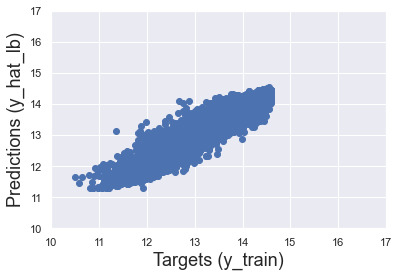

In [74]:
plt.scatter(y_train, y_hat_lb_def)

plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat_lb)',size=18)


plt.xlim(10,17)
plt.ylim(10,17)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

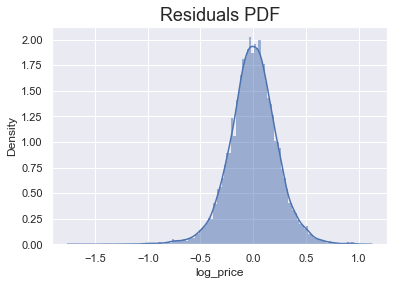

In [75]:
sns.histplot(y_train - y_hat_lb_def, kde=True, stat="density", linewidth=0)

plt.title("Residuals PDF", size=18)

In [76]:
r2 = r2_score (y_train, y_hat_lb_def)

print ('R-squared score', round (r2,2))

R-squared score 0.92


In [77]:
y_hat_test_lb_def=lb.predict(x_test)

<AxesSubplot:xlabel='log_price', ylabel='Density'>

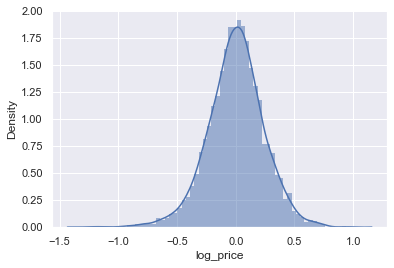

In [78]:
sns.histplot(y_test-y_hat_test_lb_def, kde=True, stat="density", linewidth=0)

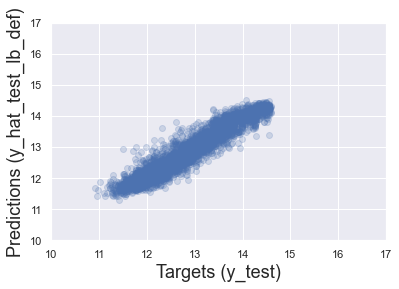

In [79]:
plt.scatter(y_test,y_hat_test_lb_def, alpha = 0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test_lb_def)',size=18)
plt.xlim(10,17)
plt.ylim(10,17)
plt.show()

In [80]:
df_pf = pd.DataFrame(np.exp(y_hat_test_lb_def), columns=['Prediction'])

y_test = y_test.reset_index(drop=True)

df_pf['Target'] = np.exp(y_test)

df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,651462.57,850000.00,198537.43,23.36
1,187125.19,99000.00,-88125.19,89.02
2,203981.83,199000.00,-4981.83,2.50
3,129729.78,130000.00,270.22,0.21
4,334638.57,395000.00,60361.43,15.28
...,...,...,...,...
4113,521018.00,414000.00,-107018.00,25.85
4114,210907.82,149000.00,-61907.82,41.55
4115,1003274.51,725000.00,-278274.51,38.38
4116,162154.33,159000.00,-3154.33,1.98


In [81]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,4118.00,4118.00,4118.00,4118.00
mean,501811.67,520584.60,18772.93,19.21
std,400218.47,451160.18,163698.16,19.90
min,81058.52,55000.00,-839214.23,0.00
25%,200149.72,194000.00,-39685.57,6.66
50%,349624.77,359000.00,1812.34,14.39
75%,674798.58,685000.00,60190.78,25.84
max,1996549.16,2190000.00,1427091.25,319.19


In [82]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by=['Difference%'], ascending = False)

,Prediction,Target,Residual,Difference%
3879,414994.07,99000.00,-315994.07,319.19
3914,824660.09,225000.00,-599660.09,266.52
2299,435157.42,130000.00,-305157.42,234.74
2628,985176.36,300000.00,-685176.36,228.39
191,386879.18,123000.00,-263879.18,214.54
...,...,...,...,...
717,619903.79,620000.00,96.21,0.02
2606,160011.95,160000.00,-11.95,0.01
280,234983.99,235000.00,16.01,0.01
393,1179964.16,1180000.00,35.84,0.00


In [83]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_hat_test_lb_def, y_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_hat_test_lb_def, y_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_hat_test_lb_def, y_test)))

r2_lb_def = r2_score (y_hat_test_lb_def, y_test)

print ('R-squared score', round (r2_lb_def,3))

Mean Absolute Error: 0.18554628404109294
Mean Squared Error: 0.05993169412091412
Root Mean Squared Error: 0.2448095057813608
R-squared score 0.896


# Tecnica 5: Hyperparameter-tuned LGBM Regressor

In [84]:
start = time.time()
lb=LGBMRegressor()  

In [85]:

from sklearn.model_selection import RandomizedSearchCV

params = {
    "learning_rate": (0.01, 0.03, 0.1, 0.3, 0.5), # default 0.1 
    "max_depth": (1, 2, 3, 4, 5, 6), # default 3
    "n_estimators": (50, 100, 150, 200), # default 100
    "subsample": (0.1, 0.3, 0.5, 1)
}

lb = RandomizedSearchCV(estimator = lb, param_distributions = params,
                        scoring='neg_mean_squared_error', n_iter = 50, cv = 5, 
                        verbose=False, random_state=42, n_jobs = -1)

In [86]:
lb.fit(x_train,y_train)
end = time.time()
diff_lb = end - start
print ('Execution time for LGBM:', round(diff_lb,2), 'seconds')

Execution time for LGBM: 49.58 seconds


In [87]:
lb.best_params_

{'subsample': 0.1, 'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.3}

In [88]:
y_hat_lb = lb.predict(x_train)

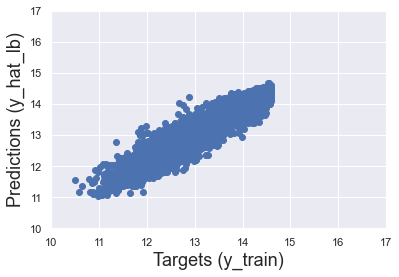

In [89]:
plt.scatter(y_train, y_hat_lb)

plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat_lb)',size=18)


plt.xlim(10,17)
plt.ylim(10,17)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

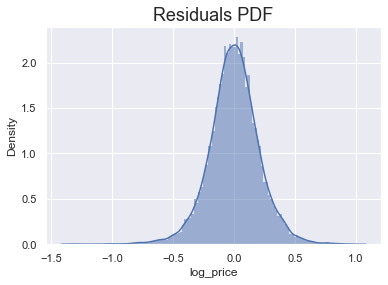

In [90]:
sns.histplot(y_train - y_hat_lb, kde=True, stat="density", linewidth=0)

plt.title("Residuals PDF", size=18)

In [91]:
r2 = r2_score (y_train, y_hat_lb)

print ('R-squared score', round (r2,2))

R-squared score 0.93


Vamos a probar el modelo en los valores de prueba ahora.


In [92]:
y_hat_test_lb=lb.predict(x_test)

<AxesSubplot:xlabel='log_price', ylabel='Density'>

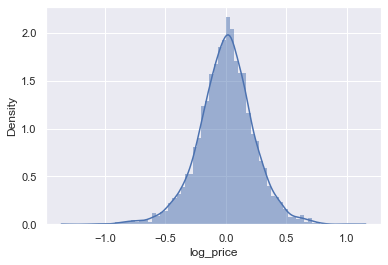

In [93]:
sns.histplot(y_test-y_hat_test_lb, kde=True, stat="density", linewidth=0)

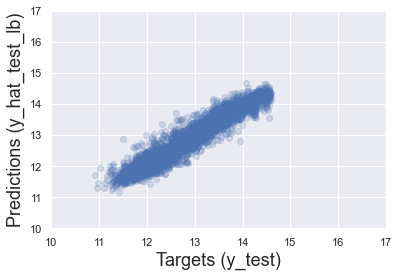

In [94]:
plt.scatter(y_test,y_hat_test_lb, alpha = 0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test_lb)',size=18)
plt.xlim(10,17)
plt.ylim(10,17)
plt.show()

In [95]:
df_pf = pd.DataFrame(np.exp(y_hat_test_lb), columns=['Prediction'])

y_test = y_test.reset_index(drop=True)

df_pf['Target'] = np.exp(y_test)

df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,629147.49,850000.00,220852.51,25.98
1,185783.74,99000.00,-86783.74,87.66
2,199086.65,199000.00,-86.65,0.04
3,130691.70,130000.00,-691.70,0.53
4,352999.46,395000.00,42000.54,10.63
...,...,...,...,...
4113,506797.33,414000.00,-92797.33,22.41
4114,212088.05,149000.00,-63088.05,42.34
4115,1005535.72,725000.00,-280535.72,38.69
4116,164949.94,159000.00,-5949.94,3.74


In [96]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,4118.00,4118.00,4118.00,4118.00
mean,505896.13,520584.60,14688.47,18.13
std,411114.88,451160.18,155334.96,18.30
min,69287.02,55000.00,-1071619.13,0.00
25%,198262.47,194000.00,-38792.08,6.30
50%,348168.33,359000.00,1437.42,13.70
75%,682821.50,685000.00,54361.85,24.11
max,2371619.13,2190000.00,1311787.17,289.80


In [97]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by=['Difference%'], ascending = False)

,Prediction,Target,Residual,Difference%
3879,385899.33,99000.00,-286899.33,289.80
2628,898916.11,300000.00,-598916.11,199.64
3914,636580.51,225000.00,-411580.51,182.92
2984,434793.91,160000.00,-274793.91,171.75
3279,151398.41,61000.00,-90398.41,148.19
...,...,...,...,...
2,199086.65,199000.00,-86.65,0.04
3418,130040.68,130000.00,-40.68,0.03
3054,179942.72,179999.00,56.28,0.03
3364,445133.86,445000.00,-133.86,0.03


In [98]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_hat_test_lb, y_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_hat_test_lb, y_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_hat_test_lb, y_test)))

r2_lb = r2_score (y_hat_test_lb, y_test)

print ('R-squared score', round (r2_lb,2))

Mean Absolute Error: 0.17581263131575178
Mean Squared Error: 0.054198405230949015
Root Mean Squared Error: 0.23280550945144965
R-squared score 0.91


# Comparación

No se considerará más la regresión lineal OLS, ya que era evidente que tanto sus gráficos como sus métricas eran mucho peores que las otras técnicas. La razón más probable es que la naturaleza del conjunto de datos incluye muchos valores atípicos, y OLS tiene dificultades para manejarlos, lo que resulta en un alto error acumulado y un valor de R-cuadrado bajo.


In [99]:
from tabulate import tabulate

table = [["Mean Absolute Error", metrics.mean_absolute_error(y_hat_test_OLS, y_test),
          metrics.mean_absolute_error(y_hat_test_rf, y_test),
          metrics.mean_absolute_error(y_hat_test_cb, y_test),
          metrics.mean_absolute_error(y_hat_test_lb_def, y_test),
          metrics.mean_absolute_error(y_hat_test_lb, y_test)], 
         
        ["Mean Squared Error", metrics.mean_squared_error(y_hat_test_OLS,y_test),
        metrics.mean_squared_error(y_hat_test_rf, y_test),
        metrics.mean_squared_error(y_hat_test_cb, y_test),
        metrics.mean_squared_error(y_hat_test_lb_def, y_test),
        metrics.mean_squared_error(y_hat_test_lb, y_test)],
         
        ['Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(y_hat_test_OLS,y_test)),
        np.sqrt(metrics.mean_squared_error(y_hat_test_rf, y_test)),
        np.sqrt(metrics.mean_squared_error(y_hat_test_cb, y_test)),
        np.sqrt(metrics.mean_squared_error(y_hat_test_lb_def, y_test)),
        np.sqrt(metrics.mean_squared_error(y_hat_test_lb, y_test)) ],
         
        ['R-squared score', round(r2_OLS,3), round (r2_rf,3), round (r2_cb,3), round(r2_lb_def, 3),
         round (r2_lb,3)],
                  
        ['Execution time (seconds)', '-', round(diff_rf,2), round(diff_cb,2), round(diff_lb_def,2), 
         round(diff_lb,2)]]


print(tabulate(table, headers=["Parameter", "Lin.reg OLS", "RandomForest","Catboost","LGBM", "Tuned LGBM"], 
               numalign = "left"))

Parameter                 Lin.reg OLS          RandomForest    Catboost    LGBM       Tuned LGBM
------------------------  -------------------  --------------  ----------  ---------  ------------
Mean Absolute Error       0.24352898579893062  0.183056        0.177619    0.185546   0.175813
Mean Squared Error        0.10127140065264154  0.0666803       0.0543209   0.0599317  0.0541984
Root Mean Squared Error   0.318231677638543    0.258225        0.233068    0.24481    0.232806
R-squared score           0.814                0.891           0.906       0.896      0.908
Execution time (seconds)  -                    35.19           16.91       1.02       49.58



El LGBM ajustado con hiperparámetros proporciona los mejores resultados en todas las métricas, con el resultado mínimo en las 3 métricas de error y el resultado máximo en la puntuación R-cuadrado. Es notable que RandomForest, Catboost y LGBM tuvieron un rendimiento similar y superaron significativamente a OLS (~10% mejor puntuación R-cuadrado). Esto se debe probablemente a que el conjunto de datos contiene numerosos valores atípicos, con los que OLS tiene dificultades.

Para obtener el mejor poder predictivo posible de los algoritmos, es necesario ajustar los hiperparámetros. Esto tiene la limitación de que aumenta el tiempo de cálculo y el ajuste en sí es diferente para cada conjunto de datos, requiriendo ajustes iterativos hasta obtener un resultado satisfactorio. El ajuste de hiperparámetros solo se realizó en LGBM, ya que es el algoritmo más rápido en general y la aplicación del ajuste no afecta significativamente su velocidad. Es importante destacar que los tres algoritmos tuvieron un buen desempeño sin ajuste de hiperparámetros.

Se ejecutó un script separado para ajustar hiperparámetros en RF y Catboost, pero los resultados no mejoraron significativamente, mientras que el tiempo de cálculo aumentó mucho.

En conclusión, el ajuste de hiperparámetros en este proyecto no logró mejorar significativamente los resultados y, si se desea una velocidad de entrenamiento rápida, se pueden utilizar los parámetros predeterminados establecidos por cada técnica con un buen nivel de precisión en los resultados. El modelo de regresión Catboost pudo predecir correctamente el 91% del precio del conjunto de datos de prueba de bienes raíces, lo cual es una mejora significativa en comparación con la versión anterior del proyecto (puntuación R-cuadrado del 82%). Se atribuye este aumento de rendimiento a la inclusión de la característica de ubicación (en la columna 'subtitle' del conjunto de datos).